## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [40]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [41]:
df = pd.read_csv ('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [42]:
(row, col) = df.shape
print ('The number of rows is', row)

The number of rows is 294478


c. The number of unique users in the dataset.

In [43]:
len(df['user_id'].unique())

290584

d. The proportion of users converted.

In [44]:
df['converted'].value_counts()

0    259241
1     35237
Name: converted, dtype: int64

In [45]:
prop_converted = 35237/290584
print (f'The proportion of users converted is {prop_converted*100:.4f} %')

The proportion of users converted is 12.1263 %


e. The number of times the `new_page` and `treatment` don't match.

In [46]:
treatment = df.query("group == 'treatment' and landing_page == 'old_page'").shape[0]
control = df.query("group == 'control' and landing_page == 'new_page'").shape[0]

not_lineup = treatment + control
print (f'The number of times new_page and treatment dont line up {not_lineup}')

The number of times new_page and treatment dont line up 3893


f. Do any of the rows have missing values?

In [47]:
df.info()

print('No rows have missing values')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
No rows have missing values


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [48]:
df2 = df.drop(df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page") or (group == "control" and landing_page != "old_page") or (group != "control" and landing_page == "old_page")').index)

In [49]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [50]:
len(df2['user_id'].unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [51]:
df2[df2['user_id'].duplicated()]
#The value repeated is 773192

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [52]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [53]:
df2.drop(2893, inplace = True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [54]:
prob_pay = df2['converted'].mean()
print(f'The probability is {prob_pay:.4f} ')

The probability is 0.1196 


b. Given that an individual was in the `control` group, what is the probability they converted?

In [55]:
prob_cont = df2.query("group == 'control'")['converted'].mean()
print(f'The probability is {prob_cont:.4f} ')

The probability is 0.1204 


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [56]:
prob_treat = df2.query("group == 'treatment'")['converted'].mean()
print(f'The probability is {prob_treat:.4f} ')

The probability is 0.1188 


d. What is the probability that an individual received the new page?

In [57]:
prob_newp = (df2.query('landing_page == "new_page"').shape[0]) / (df2.shape[0])
print(f'The probability is {prob_newp:.4f} ')

The probability is 0.5001 


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

The probability of conversion after reciving the old page is higher than the probabilty of conversion after receiving the new page. This means people are more likely to convert after recieving the old control page. The probability of receiving either page is 50% which means this is a fair comparison, and the results are reliable. The data shows that the new page actually leads to less conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H_{0}$: $p_{new}$ <= $p_{old}$ 

$H_{1}$: $p_{new}$ > $p_{old}$ 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [58]:
pnew = df2['converted'].mean()

print(f'The converion rate is {pnew:.4f} ')

The converion rate is 0.1196 


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [59]:
pold = df2['converted'].mean()

print(f'The converion rate is {pold:.4f} ')

The converion rate is 0.1196 


c. What is $n_{new}$, the number of individuals in the treatment group?

In [60]:
nnew = len(df2.query('landing_page=="new_page"'))
print(f' n(new) is {nnew} ')

 n(new) is 145310 


d. What is $n_{old}$, the number of individuals in the control group?

In [61]:
nold = len(df2.query('landing_page=="old_page"'))
print(f' n(old) is {nold} ')

 n(old) is 145274 


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [62]:
new_page_converted = np.random.binomial(1, pnew, nnew)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [63]:
old_page_converted = np.random.binomial(1, pold, nold)
old_page_converted

array([0, 0, 0, ..., 1, 0, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [64]:
diff = new_page_converted.mean() - old_page_converted.mean()
print(f' p(new)-p(old) is {diff:.2f} ')

 p(new)-p(old) is 0.00 


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [65]:
new = (np.random.binomial(nnew, pnew, 10000))/(nnew)
old = (np.random.binomial(nold, pold, 10000))/(nold)
p_diffs = new - old
p_diffs

array([  9.20018582e-04,  -2.50750040e-03,  -1.15809551e-03, ...,
        -6.38166272e-05,  -2.27148905e-05,  -1.53034409e-03])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0,0.5,'frequency')

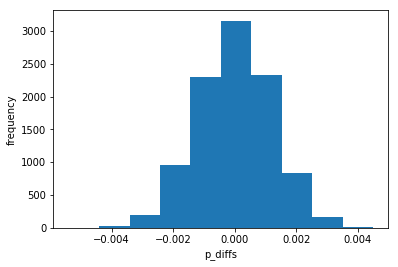

In [66]:
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('frequency')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [67]:
actual = prob_treat - prob_cont

p_val = (p_diffs > actual ).mean()
print(f' The proportion is {p_val:.4f}')

 The proportion is 0.9034


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The value computed in j is called the p-value. The p-value computed is 0.9036 is greater than the alpha value of 0.05, thus we cannot reject the null hypothesies. We have been unable to prove that the new page leads to more conversions with this analysis, as the null hypothesis is still valid.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [68]:
import statsmodels.api as sm

convert_old =  df2.query("landing_page == 'old_page'")['converted'].sum()
convert_new = df2.query("landing_page == 'new_page'")['converted'].sum()
n_old = nold
n_new = nnew


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [69]:
(z,p) = sm.stats.proportions_ztest(np.array([convert_old, convert_new]), np.array([nold, nnew]), alternative = 'smaller')
print(f' The p value is {p:.4f} \n  The z value is {z:.4f}')

 The p value is 0.9051 
  The z value is 1.3109


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The critical z value is 1.96 as we are using a z test. The critical value is greater than the computed z value (1.31), so we fail to reject the null hypothesis. And again, the p value (0.91) is greater than alpha = 0.05 so we cannot reject the null hypothesis. The findings agree with parts j and k, but in both cases we fail to reject the null hypothesis leaving our findings inconclusive. On these results we cannot say whether or not the new page leads to more conversions than the old page. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

A logistic regression is performed as a binary dependent variable is being modelled. 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [70]:
df2['intercept'] = 1
df2[[ 'ab_page', 'drop']] = pd.get_dummies(df2['landing_page'])
df2 = df2.drop('drop', 1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [71]:
logm = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
fitm = logm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [72]:
fitm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-06-07 15:42 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The p value associated with ab_page is 0.1897 which is lower different than the p value (0.9) obtained in Part II. This different arises because the hypotheses ase different in both parts. In part II the null hypothesis was $p_{new}$ <= $p_{old}$ and the alternative hypothesis was $p_{new}$ > $p_{old}$. In part III the null hypothesis is $p_{new}$ = $p_{old}$ and the alternative hypothesis is $p_{new}$ != $p_{old}$. Therefore, as the hypothesese differed, different z tests were used in both parts resulting in different p values. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

We have failed to reject the null hypothesis both time above. The results show that receiving either page (new or old) does not impact conversion much. Checking to see if other variables affect conversion is a good idea, as they may have a greater impacct on conversion. The problems that will arise are that the results would me more complex and harder to interpret, and if there is a collinearity between the variables, the results will not be robust. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [73]:
countries = pd.read_csv('./countries.csv')
df3 = df2.set_index('user_id').join(countries.set_index('user_id'))
df3.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [74]:
df3[['CA', 'UK', 'US']] = pd.get_dummies(df3['country'])

logm2 = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'US', 'CA']])

fit2 = logm2.fit()
fit2.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-06-07 15:42 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9794    0.0127  -155.4145  0.0000  -2.0044  -1.9544
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
US           -0.0099    0.0133    -0.7433  0.4573  -0.0359   0.0162
CA           -0.0506    0.0284    -1.7835  0.0745  -0.1063   0.0050
==================================================================

"""

The p values are greater than 0.05 so we fail to reject the null hypothesis. We are unable to prove that country has a significant impact on conversion. 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [75]:
df3['US_ab'] = df3['ab_page'] * df3['US']
df3['CA_ab'] = df3['ab_page'] * df3['CA']

logm3 = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'US_ab', 'CA_ab']])
fit3 = logm3.fit()
fit3.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-06-07 15:42 AIC:              212778.9383
No. Observations:   290584           BIC:              212821.2568
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page       0.0074    0.0180     0.4098  0.6819  -0.0279   0.0427
US_ab        -0.0257    0.0188    -1.3634  0.1728  -0.0625   0.0112
CA_ab        -0.0901    0.0405    -2.2252  0.0261  -0.1694  -0.0107
==================================================================

"""

There is a stastistical significance of a user in Canada who receives a new page; that user is more likely to convert as the p value is smaller than 0.05. However, in practice this result holds little value. In the previous parts we proved that the landing page recieved, and the country do not significantly impact conversion of a user. Even now, the data show a stastistical signifcance of a user receiving the new page in Canada, but it does not show a significance for the same user in the US. After all the analyses conducted, we are unable to reject the null hypothesis and we have been unable to prove that the new page leads to more conversion. Therefore, it is best to keep the old landing page for users in all countries. 

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [76]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0